# **About Delhivery**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

# **Problem Statement**

We have been given data on trips performed by parcels for Delhivery, which has attributes like trip_creation_time, routes, source and destination places, and open-source routing engine time. We need to clean, sanitize and manipulate data and get useful features and provide data to help them build forecasting models.

**Importing required Python Libraries**

In [3]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from scipy.special import comb
from scipy.stats import binom
from scipy.stats import norm,t
from scipy.stats import poisson, expon,geom, ttest_1samp, ttest_ind,ttest_ind_from_stats,boxcox
from scipy.stats import shapiro, levene, kruskal, chi2, chi2_contingency,pearsonr, spearmanr
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
df = pd.read_csv('delhivery_data.csv')


**Observations**

 on shape of data, data types of all the attributes, conversion of categorical attributes to 'category', missing value detection, statistical summary

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [9]:
df.shape


(144867, 24)

In [10]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [11]:
df.nunique() # number of unique values in columns

,0
data,2
trip_creation_time,14817
route_schedule_uuid,1504
route_type,2
trip_uuid,14817
source_center,1508
source_name,1498
destination_center,1481
destination_name,1468
od_start_time,26369


In [12]:
df.isna().sum() #missing values in columns

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [13]:
df.describe() #Statistical summary of the dataset

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [14]:
df.describe(include=object)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


In [15]:
#Checking for source center value for which source name is null
df[(df["source_name"].notnull()) & (df["source_center"].isin(df[df["source_name"].isnull()]["source_center"]))]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor


In [16]:
#Checking for destination center value for which destination name is null
df[(df["destination_name"].notnull()) & (df["destination_center"].isin(df[df["destination_name"].isnull()]["destination_center"]))]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor


In [17]:
#Here we can observe that minimum value of segment_actual_time and segment_factor is negative,
#which seems false values as time can not be negative, so we will drop that data
df.drop(df[df["segment_actual_time"]<0].index, inplace=True)

In [18]:
df.describe()


,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144846.000000,144846.000000,144846.000000,144846.000000,144846.000000,144846.000000,144846.000000,144846.000000,144846.000000,144846.000000,144846.000000
mean,961.226537,232.911057,234.057171,416.908724,213.853002,284.750969,2.120190,36.207427,18.507304,22.828528,2.219084
std,1036.993595,344.740981,344.974984,598.085058,307.997702,421.101831,1.715508,53.561259,14.775870,17.860268,4.847144
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,0.000000,0.000000,0.000000,-1.000000
25%,161.000000,22.000000,23.354927,51.000000,27.000000,29.909925,1.604288,20.000000,11.000000,12.070100,1.347826
50%,449.000000,66.000000,66.126234,132.000000,64.000000,78.524600,1.857143,29.000000,17.000000,23.513000,1.684211
75%,1634.000000,286.000000,286.706673,513.000000,257.000000,343.062075,2.213589,40.000000,22.000000,27.812975,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.403700,574.250000


Dataset Information
data: It contains whether the data is testing or training type

trip_creation_time: It is the timestamp of trip_creation. It ranges from '2018-09-12 00:25:19.499696' to '2018-10-03 23:59:42.701692'

oute_schedule_uuid: it is unique_id for particular route schedule

route type: It contains whether the route is Full Truck Load or Carting type

trip_uuid: It is a unique id associated with a particular trip

source_center: It is the ID of the origin of the trip

source_name: Its the name of the origin of the trip

destination_center: It is the ID of the destination of the trip

destination_name: It is the name of the destination of the trip

od_start_time: It is the trip start time

od_end_time: It is the trip end time

Start_scan_to_end_scan: It gives the time taken to deliver from source to destination. It ranges from 20 to 7898.

is_cutoff: It is an unknown field, which is boolean

cutoff_factor: It is the rounded value of the actual_distance_to_destination, it ranges from 9 to 1927

cutoff_timestamp: It is an unknown field

actual_distance_to_destination: It is the distance between the source and destination warehouses, it ranges from 9.00 to 1927.44

actual_time: It contains the actual time taken to complete the delivery (cumulative), it ranges from 9 to 4532.

osrm_time: It is an open-source routing engine time calculator which computes the shortest path between points in a given map and gives the time (cumulative), it ranges from 6 to 1686

osrm_distance: It contains the distance to the destination based on osrm, it ranges from 9.00 to 2326.199

factor: It is a ratio of actual_time to osrm_time, it ranges from 0.144 to 77.38.

segment_actual_time: It is a segment time, a time taken by a subset of package delivery, It ranges from -244 to 3051

segment_osrm_time: It contains the orsm time taken by a subset of the package delivery. It ranges from 0 to 1611

segment_osrm_distance: It contains OSRM distance, the distance covered by a subset of package delivery, it ranges from 0 to 2191.40

segment_factor: It is a ratio between segment_actual_time to segment_osrm_time, it ranges from -23.544 to 574.25

# **Univariate Analysis**

<Axes: xlabel='start_scan_to_end_scan', ylabel='Count'>

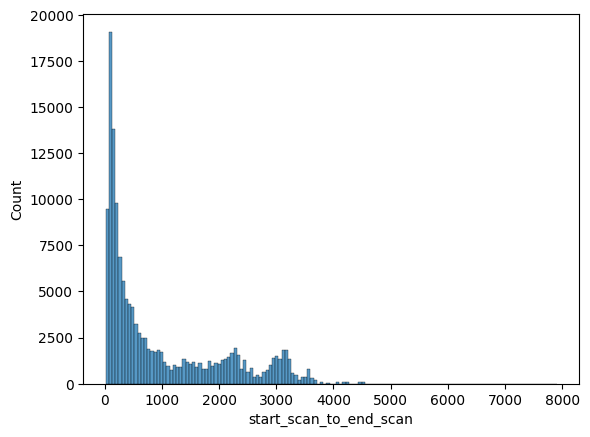

In [19]:
#Histplot for start_to_scan_to_end_scan attribute
sns.histplot(df["start_scan_to_end_scan"])

<Axes: xlabel='cutoff_factor', ylabel='Count'>

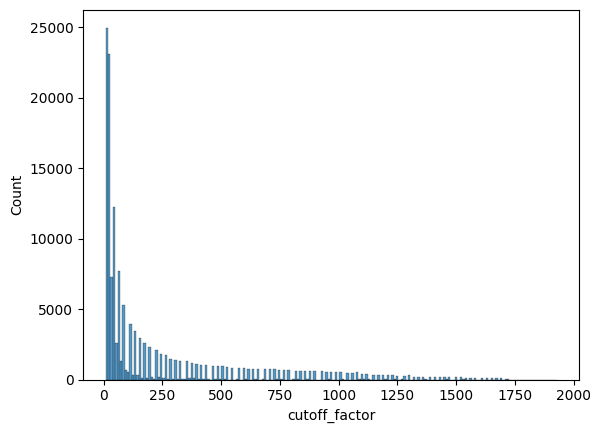

In [20]:
#Histplot for cutoff_factor attribute
sns.histplot(df["cutoff_factor"])

<Axes: xlabel='actual_distance_to_destination', ylabel='Count'>

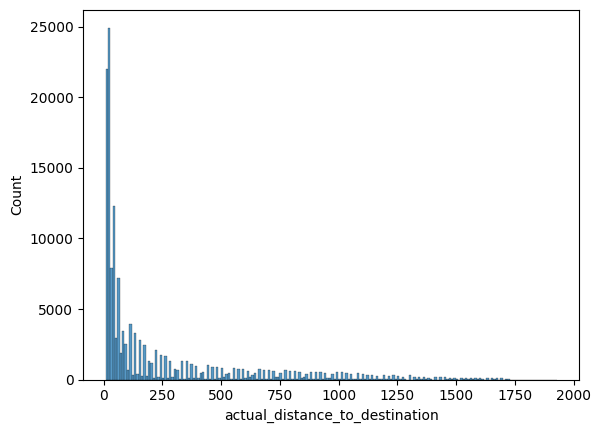

In [21]:
#Histplot for actual_distance_to_destination attribute
sns.histplot(df["actual_distance_to_destination"])

<Axes: xlabel='segment_actual_time', ylabel='Count'>

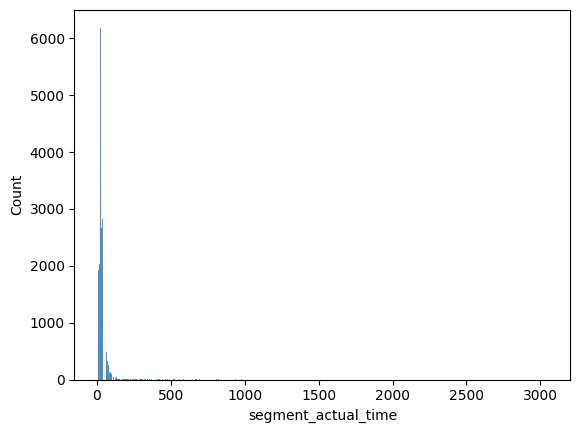

In [22]:
#Histplot for segment_actual_time attribute
sns.histplot(df["segment_actual_time"])

<Axes: xlabel='segment_osrm_time', ylabel='Count'>

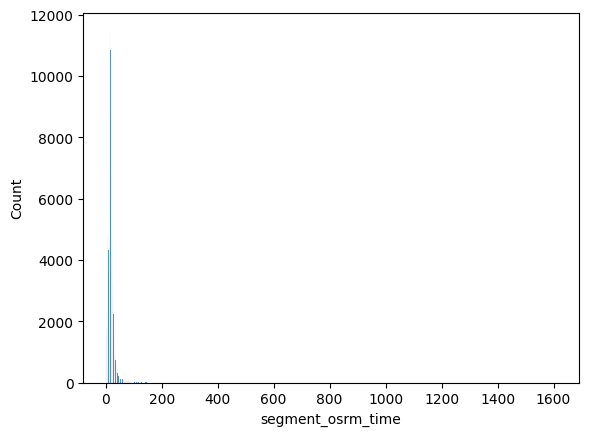

In [23]:
#Histplot for segment_osrm_time attribute
sns.histplot(df["segment_osrm_time"])

<Axes: xlabel='actual_time', ylabel='Count'>

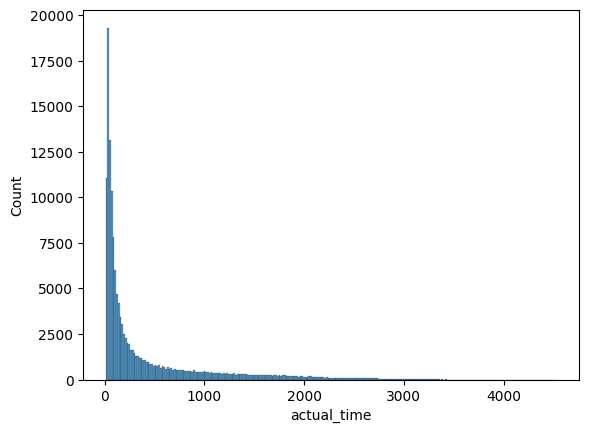

In [24]:
#Histplot for actual_time attribute
sns.histplot(df["actual_time"])

<Axes: xlabel='osrm_distance', ylabel='Count'>

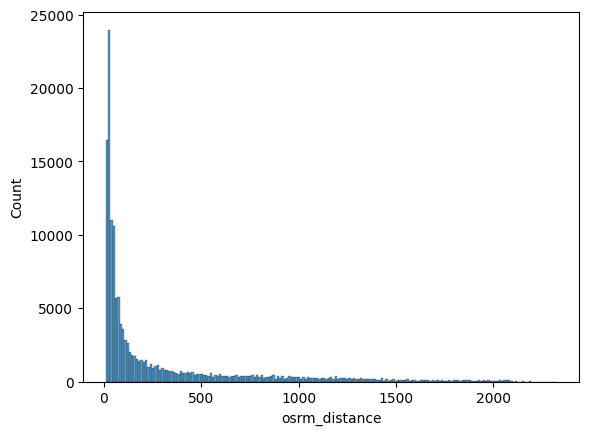

In [25]:
#Histplot for osrm_distance attribute
sns.histplot(df["osrm_distance"])

<Axes: xlabel='segment_osrm_distance', ylabel='Count'>

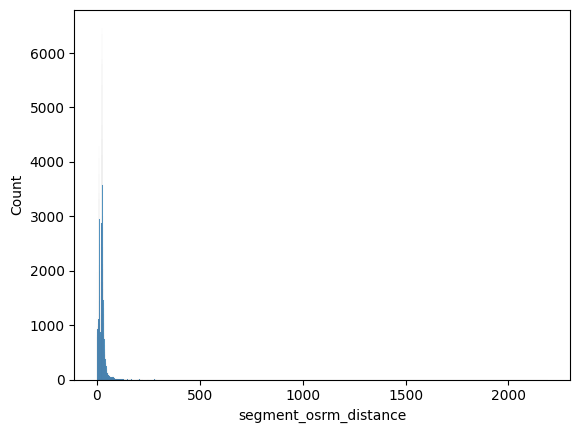

In [26]:
#Histplot for segment_osrm_distance attribute
sns.histplot(df["segment_osrm_distance"])

# **Bivariate Analysis**

<Axes: xlabel='actual_distance_to_destination', ylabel='actual_time'>

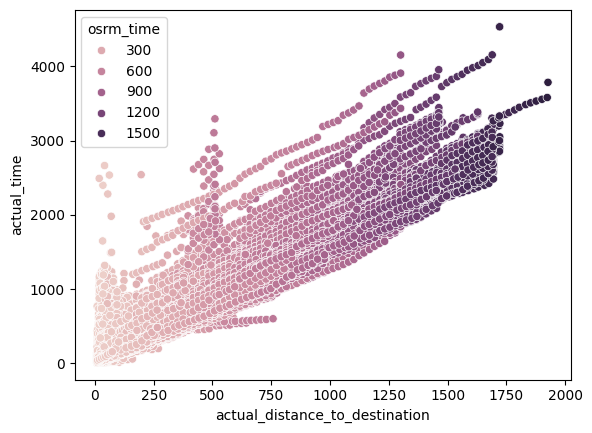

In [27]:
#Scatterplot between actual-distance_to_destination, actual_time and osrm_time
sns.scatterplot(data=df, x="actual_distance_to_destination",y="actual_time", hue="osrm_time")

<Axes: xlabel='segment_osrm_distance', ylabel='segment_osrm_time'>

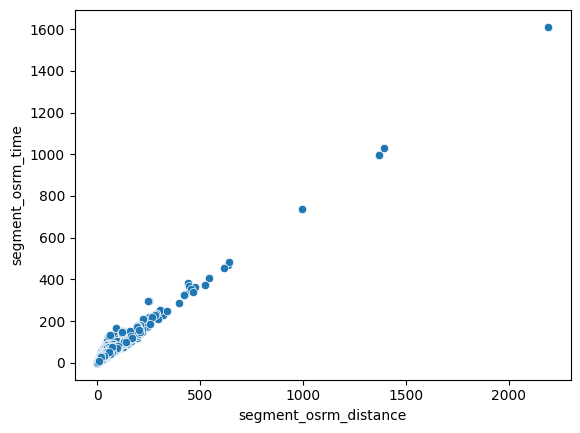

In [28]:
#scatterplot between segment_osrm_distance and segment_osrm_time
sns.scatterplot(data=df, x="segment_osrm_distance",y="segment_osrm_time")

<Axes: xlabel='segment_actual_time', ylabel='segment_osrm_time'>

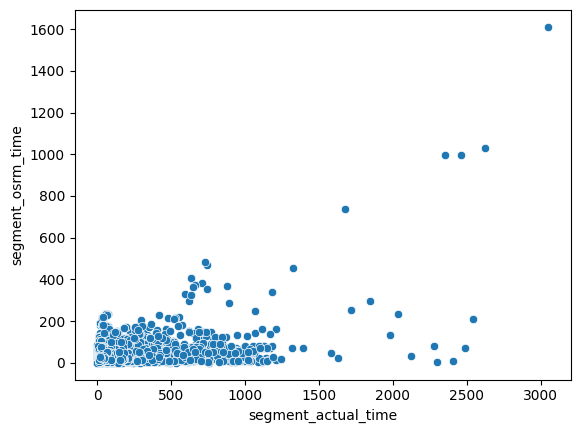

In [29]:
#scatterplot between segment_actual_time and segment_osrm_time
sns.scatterplot(data=df, x="segment_actual_time",y="segment_osrm_time")

In [35]:
#Drop non-numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])


In [34]:
df_numeric.corr()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
start_scan_to_end_scan,1.000000,0.784656,0.784988,0.785924,0.785283,0.784120,-0.023192,0.093372,0.219844,0.306972,-0.020225
cutoff_factor,0.784656,1.000000,0.999986,0.978719,0.995833,0.997116,-0.064559,0.045063,0.157942,0.231109,-0.031439
actual_distance_to_destination,0.784988,0.999986,1.000000,0.978658,0.995872,0.997148,-0.064743,0.045320,0.158836,0.232119,-0.031588
actual_time,0.785924,0.978719,0.978658,1.000000,0.977996,0.979398,0.033498,0.124483,0.171480,0.242296,0.017570
osrm_time,0.785283,0.995833,0.995872,0.977996,1.000000,0.999119,-0.069081,0.049977,0.177074,0.242288,-0.033038
osrm_distance,0.784120,0.997116,0.997148,0.979398,0.999119,1.000000,-0.065391,0.048787,0.169157,0.239672,-0.031786
factor,-0.023192,-0.064559,-0.064743,0.033498,-0.069081,-0.065391,1.000000,0.518451,-0.053154,-0.036724,0.540448
segment_actual_time,0.093372,0.045063,0.045320,0.124483,0.049977,0.048787,0.518451,1.000000,0.433604,0.449167,0.483699
segment_osrm_time,0.219844,0.157942,0.158836,0.171480,0.177074,0.169157,-0.053154,0.433604,1.000000,0.948520,-0.068472
segment_osrm_distance,0.306972,0.231109,0.232119,0.242296,0.242288,0.239672,-0.036724,0.449167,0.948520,1.000000,-0.059317


<Axes: >

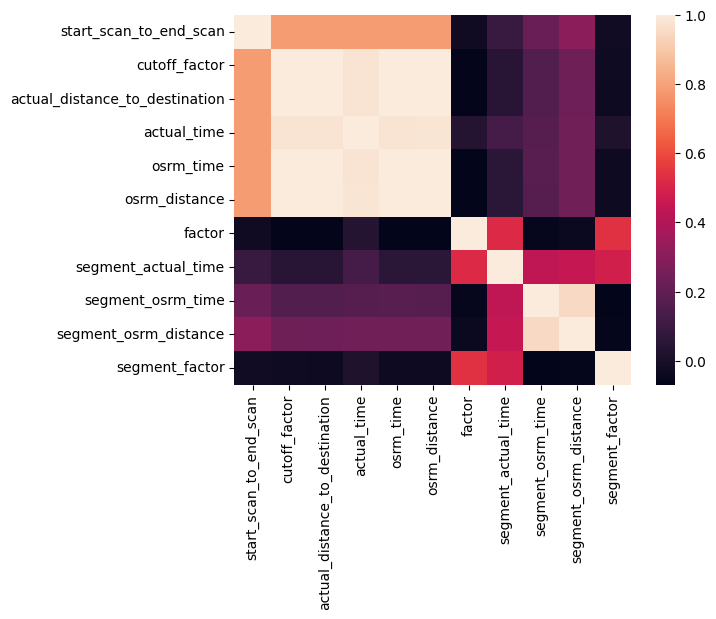

In [36]:
# Now ploting the heatmap
sns.heatmap(df_numeric.corr())

# **Data Wrangling**

In [37]:
#merging of rows based on trip_id and source and destination details
data=df.groupby(["route_type","trip_uuid","trip_creation_time","source_center","source_name","destination_center","destination_name","od_start_time","od_end_time","start_scan_to_end_scan"]).aggregate({"cutoff_factor":"max","actual_distance_to_destination":"max","segment_actual_time":"sum", "segment_osrm_time":"sum", "actual_time":"max", "osrm_time":"max","osrm_distance":"max","segment_osrm_distance":"sum"}).reset_index()
data

,route_type,trip_uuid,trip_creation_time,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,segment_actual_time,segment_osrm_time,actual_time,osrm_time,osrm_distance,segment_osrm_distance
0,Carting,trip-153671042288605164,2018-09-12 00:00:22.886430,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24,24.644021,46.0,26.0,47.0,26.0,28.1994,28.1995
1,Carting,trip-153671042288605164,2018-09-12 00:00:22.886430,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48,48.542890,95.0,39.0,96.0,42.0,56.9116,55.9899
2,Carting,trip-153671046011330457,2018-09-12 00:01:00.113710,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17,17.175274,59.0,16.0,59.0,15.0,19.6800,19.8766
3,Carting,trip-153671055416136166,2018-09-12 00:02:34.161600,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),2018-09-12 02:12:10.755603,2018-09-12 03:13:03.432532,60.0,15,15.325529,39.0,12.0,40.0,12.0,16.2225,16.2225
4,Carting,trip-153671055416136166,2018-09-12 00:02:34.161600,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),2018-09-12 00:02:34.161600,2018-09-12 02:12:10.755603,129.0,9,9.271519,21.0,11.0,21.0,11.0,11.8422,11.8422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26218,FTL,trip-153861014185597051,2018-10-03 23:42:21.856227,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 23:42:21.856227,2018-10-04 19:57:34.928573,1215.0,442,442.024575,991.0,425.0,997.0,395.0,545.1256,573.6479
26219,FTL,trip-153861023893369544,2018-10-03 23:43:58.933947,IND382715AAA,Kadi_KaranNGR_D (Gujarat),IND382430AAB,Ahmedabad_East_H_1 (Gujarat),2018-10-04 01:48:54.382343,2018-10-04 04:01:41.425627,132.0,50,50.473578,129.0,55.0,130.0,54.0,61.9571,67.2659
26220,FTL,trip-153861023893369544,2018-10-03 23:43:58.933947,IND384205AAA,Mehsana_Panchot_IP (Gujarat),IND382715AAA,Kadi_KaranNGR_D (Gujarat),2018-10-03 23:43:58.933947,2018-10-04 01:48:54.382343,124.0,34,34.270235,57.0,37.0,57.0,38.0,40.4257,40.4256
26221,FTL,trip-153861118270144424,2018-10-03 23:59:42.701692,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40,40.546740,233.0,42.0,233.0,42.0,52.5303,52.5303


In [38]:
#Merging rows based on trip_id
data=data.groupby(["route_type","trip_uuid","trip_creation_time"]).aggregate({"source_center":"first","source_name":"first","destination_center":"last",
                                     "destination_name":"last", "od_start_time":"first",
                                     "od_end_time":"last","cutoff_factor":"sum","actual_distance_to_destination":"sum","osrm_distance":"sum",
                                     "start_scan_to_end_scan":"sum", "segment_actual_time":"sum",
                                    "segment_osrm_time":"sum","actual_time":"sum",
                                     "osrm_time":"sum","segment_osrm_distance":"sum"}).reset_index()
data

,route_type,trip_uuid,trip_creation_time,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_factor,actual_distance_to_destination,osrm_distance,start_scan_to_end_scan,segment_actual_time,segment_osrm_time,actual_time,osrm_time,segment_osrm_distance
0,Carting,trip-153671042288605164,2018-09-12 00:00:22.886430,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,72,73.186911,85.1110,180.0,141.0,65.0,143.0,68.0,84.1894
1,Carting,trip-153671046011330457,2018-09-12 00:01:00.113710,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,17,17.175274,19.6800,100.0,59.0,16.0,59.0,15.0,19.8766
2,Carting,trip-153671055416136166,2018-09-12 00:02:34.161600,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),2018-09-12 02:12:10.755603,2018-09-12 02:12:10.755603,24,24.597048,28.0647,189.0,60.0,23.0,61.0,23.0,28.0647
3,Carting,trip-153671066201138152,2018-09-12 00:04:22.011653,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,9,9.100510,12.0184,98.0,24.0,13.0,24.0,13.0,12.0184
4,Carting,trip-153671066826362165,2018-09-12 00:04:28.263977,IND560043AAC,HBR Layout PC (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),2018-09-12 00:04:28.263977,2018-09-12 03:00:55.163423,22,22.424210,28.9203,146.0,64.0,34.0,64.0,34.0,28.9203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,FTL,trip-153861004148234782,2018-10-03 23:40:41.482736,IND814101AAB,Dumka_Dudhani_D (Jharkhand),IND815351AAA,Jamtara_D (Jharkhand),2018-10-04 04:22:21.025250,2018-10-04 02:24:41.382263,167,168.396341,207.4975,428.0,347.0,220.0,349.0,220.0,209.4499
14783,FTL,trip-153861007249500192,2018-10-03 23:41:12.495257,IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),2018-10-03 23:41:12.495257,2018-10-04 16:40:41.713085,192,194.552260,229.2052,1017.0,845.0,178.0,847.0,178.0,232.5811
14784,FTL,trip-153861014185597051,2018-10-03 23:42:21.856227,IND206001AAA,Etawah_MhraChng_D (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-10-05 02:44:50.858859,2018-10-04 19:57:34.928573,835,836.072017,997.7577,2180.0,1660.0,891.0,1674.0,724.0,1166.3614
14785,FTL,trip-153861023893369544,2018-10-03 23:43:58.933947,IND382715AAA,Kadi_KaranNGR_D (Gujarat),IND382715AAA,Kadi_KaranNGR_D (Gujarat),2018-10-04 01:48:54.382343,2018-10-04 01:48:54.382343,84,84.743813,102.3828,256.0,186.0,92.0,187.0,92.0,107.6915


In [39]:
data.nunique() # Unique values in the dataset


,0
route_type,2
trip_uuid,14787
trip_creation_time,14787
source_center,930
source_name,930
destination_center,1035
destination_name,1035
od_start_time,14787
od_end_time,14787
cutoff_factor,684


In [40]:
data.isna().sum() #nullvalues in the data frame


,0
route_type,0
trip_uuid,0
trip_creation_time,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0
od_end_time,0
cutoff_factor,0


In [41]:
data.describe() #statistical summary of dataset


,cutoff_factor,actual_distance_to_destination,osrm_distance,start_scan_to_end_scan,segment_actual_time,segment_osrm_time,actual_time,osrm_time,segment_osrm_distance
count,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.00000
mean,163.379523,164.290730,204.631953,529.442754,353.118618,180.482924,356.316224,161.667072,222.66823
std,305.558531,305.678137,370.953239,658.286556,556.439155,314.622727,561.528033,272.406218,416.76499
min,9.000000,9.002461,9.072900,23.000000,9.000000,6.000000,9.000000,6.000000,9.07290
25%,22.000000,22.840056,30.875600,149.000000,66.000000,30.000000,67.000000,29.000000,32.57885
50%,48.000000,48.376934,65.575600,279.000000,147.000000,65.000000,148.000000,60.000000,69.78420
75%,162.000000,163.685113,207.087600,632.000000,364.000000,184.000000,367.000000,168.000000,216.46395
max,2185.000000,2187.483994,2840.081000,7898.000000,6230.000000,2564.000000,6265.000000,2032.000000,3523.63240


In [42]:
data.describe(include=object)


,route_type,trip_uuid,trip_creation_time,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time
count,14787,14787,14787,14787,14787,14787,14787,14787,14787
unique,2,14787,14787,930,930,1035,1035,14787,14787
top,Carting,trip-153671042288605164,2018-09-12 00:00:22.886430,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591
freq,8906,1,1,1052,1052,821,821,1,1


# **Feature Generation**

In [43]:
#Feature generation like source_state and destination_state
data["source_state"]=data["source_name"].apply(lambda x: str(x).split("(")[1][:-1])
data["destination_state"]=data["destination_name"].apply(lambda x: str(x).split("(")[1][:-1])
data

,route_type,trip_uuid,trip_creation_time,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_factor,actual_distance_to_destination,osrm_distance,start_scan_to_end_scan,segment_actual_time,segment_osrm_time,actual_time,osrm_time,segment_osrm_distance,source_state,destination_state
0,Carting,trip-153671042288605164,2018-09-12 00:00:22.886430,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,72,73.186911,85.1110,180.0,141.0,65.0,143.0,68.0,84.1894,Karnataka,Karnataka
1,Carting,trip-153671046011330457,2018-09-12 00:01:00.113710,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,17,17.175274,19.6800,100.0,59.0,16.0,59.0,15.0,19.8766,Maharashtra,Maharashtra
2,Carting,trip-153671055416136166,2018-09-12 00:02:34.161600,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),2018-09-12 02:12:10.755603,2018-09-12 02:12:10.755603,24,24.597048,28.0647,189.0,60.0,23.0,61.0,23.0,28.0647,Tamil Nadu,Tamil Nadu
3,Carting,trip-153671066201138152,2018-09-12 00:04:22.011653,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,9,9.100510,12.0184,98.0,24.0,13.0,24.0,13.0,12.0184,Tamil Nadu,Tamil Nadu
4,Carting,trip-153671066826362165,2018-09-12 00:04:28.263977,IND560043AAC,HBR Layout PC (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),2018-09-12 00:04:28.263977,2018-09-12 03:00:55.163423,22,22.424210,28.9203,146.0,64.0,34.0,64.0,34.0,28.9203,Karnataka,Karnataka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,FTL,trip-153861004148234782,2018-10-03 23:40:41.482736,IND814101AAB,Dumka_Dudhani_D (Jharkhand),IND815351AAA,Jamtara_D (Jharkhand),2018-10-04 04:22:21.025250,2018-10-04 02:24:41.382263,167,168.396341,207.4975,428.0,347.0,220.0,349.0,220.0,209.4499,Jharkhand,Jharkhand
14783,FTL,trip-153861007249500192,2018-10-03 23:41:12.495257,IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),2018-10-03 23:41:12.495257,2018-10-04 16:40:41.713085,192,194.552260,229.2052,1017.0,845.0,178.0,847.0,178.0,232.5811,Bihar,Bihar
14784,FTL,trip-153861014185597051,2018-10-03 23:42:21.856227,IND206001AAA,Etawah_MhraChng_D (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-10-05 02:44:50.858859,2018-10-04 19:57:34.928573,835,836.072017,997.7577,2180.0,1660.0,891.0,1674.0,724.0,1166.3614,Uttar Pradesh,Uttar Pradesh
14785,FTL,trip-153861023893369544,2018-10-03 23:43:58.933947,IND382715AAA,Kadi_KaranNGR_D (Gujarat),IND382715AAA,Kadi_KaranNGR_D (Gujarat),2018-10-04 01:48:54.382343,2018-10-04 01:48:54.382343,84,84.743813,102.3828,256.0,186.0,92.0,187.0,92.0,107.6915,Gujarat,Gujarat


In [44]:
data.describe(include=object)


,route_type,trip_uuid,trip_creation_time,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,source_state,destination_state
count,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787
unique,2,14787,14787,930,930,1035,1035,14787,14787,29,31
top,Carting,trip-153671042288605164,2018-09-12 00:00:22.886430,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,Maharashtra,Maharashtra
freq,8906,1,1,1052,1052,821,821,1,1,2714,2561


In [45]:
data.nunique() #unique value in dataframe


,0
route_type,2
trip_uuid,14787
trip_creation_time,14787
source_center,930
source_name,930
destination_center,1035
destination_name,1035
od_start_time,14787
od_end_time,14787
cutoff_factor,684


In [46]:
data["source_state"].value_counts() #source-statewise trip count


,count
source_state,
Maharashtra,2714
Karnataka,2143
Haryana,1823
Tamil Nadu,1039
Telangana,784
Uttar Pradesh,760
Gujarat,750
Delhi,725
West Bengal,665


In [47]:
data["destination_state"].value_counts() #destination-statewise trip count


,count
destination_state,
Maharashtra,2561
Karnataka,2294
Haryana,1640
Tamil Nadu,1084
Uttar Pradesh,805
Telangana,784
Gujarat,734
West Bengal,697
Delhi,657


In [48]:
data["source_name"].value_counts().head()


,count
source_name,
Gurgaon_Bilaspur_HB (Haryana),1052
Bhiwandi_Mankoli_HB (Maharashtra),697
Bangalore_Nelmngla_H (Karnataka),624
Bengaluru_Bomsndra_HB (Karnataka),455
Pune_Tathawde_H (Maharashtra),396


In [49]:
data["source_name"].value_counts().tail()


,count
source_name,
Chikodi_IndraNgr_D (Karnataka),1
Atmakur_IndraNgr_D (Andhra Pradesh),1
Jetpur_DC (Gujarat),1
Bantwal_Trmltmpl_D (Karnataka),1
Sandur_WrdN1DPP_D (Karnataka),1


In [50]:
data["destination_name"].value_counts().head()


,count
destination_name,
Gurgaon_Bilaspur_HB (Haryana),821
Bangalore_Nelmngla_H (Karnataka),548
Bhiwandi_Mankoli_HB (Maharashtra),403
Bengaluru_Bomsndra_HB (Karnataka),342
Hyderabad_Shamshbd_H (Telangana),280


In [51]:
data["source-destination"]=data["source_name"] + data["destination_name"]


In [52]:
data["source-destination"].value_counts() #Busiest Corridors


,count
source-destination,
Bangalore_Nelmngla_H (Karnataka)Bengaluru_KGAirprt_HB (Karnataka),151
Gurgaon_Bilaspur_HB (Haryana)Gurgaon_Bilaspur_HB (Haryana),123
Bengaluru_Bomsndra_HB (Karnataka)Bengaluru_KGAirprt_HB (Karnataka),121
Bengaluru_KGAirprt_HB (Karnataka)Bangalore_Nelmngla_H (Karnataka),108
Bhiwandi_Mankoli_HB (Maharashtra)Mumbai Hub (Maharashtra),105
...,...
Khammam_NSTRoad_I (Telangana)Nalgonda_HydRoad_DC (Telangana),1
Kolkata_Dankuni_HB (West Bengal)Tarkeshwar_Naraynpr_D (West Bengal),1
Bamangola_Central_D_1 (West Bengal)Malda_krshnPly_DC (West Bengal),1


In [53]:
#Average distance
data[data["source-destination"]=="Bangalore_Nelmngla_H (Karnataka)Bengaluru_KGAirprt_HB (Karnataka)"]["actual_distance_to_destination"].mean()

28.03163476896394

In [54]:
#Average time
data[data["source-destination"]=="Bangalore_Nelmngla_H (Karnataka)Bengaluru_KGAirprt_HB (Karnataka)"]["actual_time"].mean()


87.87417218543047

In [55]:
data.drop("source-destination",axis=1,inplace=True)


In [56]:
data["trip_creation_time"]=pd.to_datetime(df["trip_creation_time"]) # conversion to datetime datatype


In [57]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   route_type                      14787 non-null  object        
 1   trip_uuid                       14787 non-null  object        
 2   trip_creation_time              14783 non-null  datetime64[ns]
 3   source_center                   14787 non-null  object        
 4   source_name                     14787 non-null  object        
 5   destination_center              14787 non-null  object        
 6   destination_name                14787 non-null  object        
 7   od_start_time                   14787 non-null  object        
 8   od_end_time                     14787 non-null  object        
 9   cutoff_factor                   14787 non-null  int64         
 10  actual_distance_to_destination  14787 non-null  float64       
 11  os

In [58]:
#Feature generation year
data["trip_creation_year"]=data["trip_creation_time"].dt.year
data["trip_creation_year"].value_counts()

,count
trip_creation_year,
2018.0,14783


In [59]:
#Feature generation month
data["trip_creation_month"]=data["trip_creation_time"].dt.month
data["trip_creation_month"].value_counts()

,count
trip_creation_month,
9.0,13092
10.0,1691


In [60]:
#Feature generation day
data["trip_creation_day"]=data["trip_creation_time"].dt.day
data["trip_creation_day"].value_counts()

,count
trip_creation_day,
25.0,1024
17.0,1000
20.0,854
23.0,820
15.0,809
12.0,779
14.0,762
28.0,731
3.0,695


In [61]:
#Feature generation triptime
data["od_start_time"]=pd.to_datetime(data["od_start_time"])
data["od_end_time"]=pd.to_datetime(data["od_end_time"])
data["trip_time"]=data["od_end_time"]-data["od_start_time"]
data

,route_type,trip_uuid,trip_creation_time,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_factor,...,segment_osrm_time,actual_time,osrm_time,segment_osrm_distance,source_state,destination_state,trip_creation_year,trip_creation_month,trip_creation_day,trip_time
0,Carting,trip-153671042288605164,2018-09-20 02:35:36.476840,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,72,...,65.0,143.0,68.0,84.1894,Karnataka,Karnataka,2018.0,9.0,20.0,0 days 00:00:00
1,Carting,trip-153671046011330457,2018-09-20 02:35:36.476840,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,17,...,16.0,59.0,15.0,19.8766,Maharashtra,Maharashtra,2018.0,9.0,20.0,0 days 01:40:29.696112
2,Carting,trip-153671055416136166,2018-09-20 02:35:36.476840,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),2018-09-12 02:12:10.755603,2018-09-12 02:12:10.755603,24,...,23.0,61.0,23.0,28.0647,Tamil Nadu,Tamil Nadu,2018.0,9.0,20.0,0 days 00:00:00
3,Carting,trip-153671066201138152,2018-09-20 02:35:36.476840,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,9,...,13.0,24.0,13.0,12.0184,Tamil Nadu,Tamil Nadu,2018.0,9.0,20.0,0 days 01:38:00.338041
4,Carting,trip-153671066826362165,2018-09-20 02:35:36.476840,IND560043AAC,HBR Layout PC (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),2018-09-12 00:04:28.263977,2018-09-12 03:00:55.163423,22,...,34.0,64.0,34.0,28.9203,Karnataka,Karnataka,2018.0,9.0,20.0,0 days 02:56:26.899446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,FTL,trip-153861004148234782,2018-09-24 05:06:56.558662,IND814101AAB,Dumka_Dudhani_D (Jharkhand),IND815351AAA,Jamtara_D (Jharkhand),2018-10-04 04:22:21.025250,2018-10-04 02:24:41.382263,167,...,220.0,349.0,220.0,209.4499,Jharkhand,Jharkhand,2018.0,9.0,24.0,-1 days +22:02:20.357013
14783,FTL,trip-153861007249500192,2018-09-24 05:06:56.558662,IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),2018-10-03 23:41:12.495257,2018-10-04 16:40:41.713085,192,...,178.0,847.0,178.0,232.5811,Bihar,Bihar,2018.0,9.0,24.0,0 days 16:59:29.217828
14784,FTL,trip-153861014185597051,2018-09-24 05:06:56.558662,IND206001AAA,Etawah_MhraChng_D (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-10-05 02:44:50.858859,2018-10-04 19:57:34.928573,835,...,891.0,1674.0,724.0,1166.3614,Uttar Pradesh,Uttar Pradesh,2018.0,9.0,24.0,-1 days +17:12:44.069714
14785,FTL,trip-153861023893369544,2018-09-24 05:06:56.558662,IND382715AAA,Kadi_KaranNGR_D (Gujarat),IND382715AAA,Kadi_KaranNGR_D (Gujarat),2018-10-04 01:48:54.382343,2018-10-04 01:48:54.382343,84,...,92.0,187.0,92.0,107.6915,Gujarat,Gujarat,2018.0,9.0,24.0,0 days 00:00:00


In [62]:
data.isnull().sum()


,0
route_type,0
trip_uuid,0
trip_creation_time,4
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0
od_end_time,0
cutoff_factor,0


In [63]:
data.dropna(inplace=True)


In [64]:
data.isnull().sum()


,0
route_type,0
trip_uuid,0
trip_creation_time,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0
od_end_time,0
cutoff_factor,0


In [65]:
data.shape


(14783, 24)

In [66]:
#conversion of triptime to float type data
data["triptime_sec"]=data["trip_time"].dt.total_seconds()

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14783 entries, 0 to 14786
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   route_type                      14783 non-null  object         
 1   trip_uuid                       14783 non-null  object         
 2   trip_creation_time              14783 non-null  datetime64[ns] 
 3   source_center                   14783 non-null  object         
 4   source_name                     14783 non-null  object         
 5   destination_center              14783 non-null  object         
 6   destination_name                14783 non-null  object         
 7   od_start_time                   14783 non-null  datetime64[ns] 
 8   od_end_time                     14783 non-null  datetime64[ns] 
 9   cutoff_factor                   14783 non-null  int64          
 10  actual_distance_to_destination  14783 non-null  float64        

In [68]:
data[data["triptime_sec"]<0]


,route_type,trip_uuid,trip_creation_time,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_factor,...,actual_time,osrm_time,segment_osrm_distance,source_state,destination_state,trip_creation_year,trip_creation_month,trip_creation_day,trip_time,triptime_sec
5,Carting,trip-153671074033284934,2018-09-20 02:35:36.476840,IND395009AAA,Surat_Central_D_12 (Gujarat),IND395004AAB,Surat_Central_D_3 (Gujarat),2018-09-12 02:31:39.246238,2018-09-12 02:01:41.638015,25,...,161.0,29.0,30.9358,Gujarat,Gujarat,2018.0,9.0,20.0,-1 days +23:30:02.391777,-1797.608223
14,Carting,trip-153671202698783427,2018-09-23 06:42:06.021680,IND395001AAA,Surat_Central_D_9 (Gujarat),IND395006AAA,Surat_Varachha_DC (Gujarat),2018-09-12 02:37:19.832796,2018-09-12 02:04:22.360575,19,...,170.0,29.0,30.5457,Gujarat,Gujarat,2018.0,9.0,23.0,-1 days +23:27:02.527779,-1977.472221
16,Carting,trip-153671225291120891,2018-09-14 15:42:46.437249,IND712103AAA,Hoogly_Bandel_D (West Bengal),IND712124AAA,Hooghly_DC (West Bengal),2018-09-12 03:09:08.473151,2018-09-12 02:16:17.710493,51,...,222.0,58.0,71.3328,West Bengal,West Bengal,2018.0,9.0,14.0,-1 days +23:07:09.237342,-3170.762658
31,Carting,trip-153671440490445199,2018-09-13 20:44:19.424489,IND140501AAA,Lalru_OnkarDPP_D (Punjab),IND134203AAA,Naraingarh_Ward2DPP_D (Haryana),2018-09-12 07:36:00.152620,2018-09-12 03:55:15.023521,47,...,147.0,64.0,103.6903,Punjab,Haryana,2018.0,9.0,13.0,-1 days +20:19:14.870901,-13245.129099
35,Carting,trip-153671508851597828,2018-09-29 22:21:45.149226,IND360530AAB,Jamjodhpur_Court_D (Gujarat),IND360575AAA,Porbandar_DC (Gujarat),2018-09-12 06:04:58.698852,2018-09-12 03:43:56.169739,178,...,553.0,192.0,245.2043,Gujarat,Gujarat,2018.0,9.0,29.0,-1 days +21:38:57.470887,-8462.529113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14768,FTL,trip-153860767482259863,2018-09-24 05:06:56.558662,IND505122AAA,Jammikunta_ConduDPP_D (Telangana),IND505467AAA,Husnabad_Greenmkt_D (Telangana),2018-10-04 03:51:10.928009,2018-10-04 02:25:04.243970,104,...,380.0,119.0,140.2444,Telangana,Telangana,2018.0,9.0,24.0,-1 days +22:33:53.315961,-5166.684039
14779,FTL,trip-153860945742225615,2018-09-24 05:06:56.558662,IND140001AAA,RoopNagar_ChotiHvl_DC (Punjab),IND140301AAA,Chandigarh_Kharar_DC (Chandigarh),2018-10-04 03:46:12.300247,2018-10-04 02:52:02.434753,183,...,281.0,207.0,216.3882,Punjab,Chandigarh,2018.0,9.0,24.0,-1 days +23:05:50.134506,-3249.865494
14781,FTL,trip-153860985527721606,2018-09-24 05:06:56.558662,IND814133AAB,Godda_Central_D_2 (Jharkhand),IND815301AAA,Giridih_Shivalya_D (Jharkhand),2018-10-04 08:29:20.440999,2018-10-04 03:01:57.954149,226,...,511.0,248.0,378.6774,Jharkhand,Jharkhand,2018.0,9.0,24.0,-1 days +18:32:37.513150,-19642.486850
14782,FTL,trip-153861004148234782,2018-09-24 05:06:56.558662,IND814101AAB,Dumka_Dudhani_D (Jharkhand),IND815351AAA,Jamtara_D (Jharkhand),2018-10-04 04:22:21.025250,2018-10-04 02:24:41.382263,167,...,349.0,220.0,209.4499,Jharkhand,Jharkhand,2018.0,9.0,24.0,-1 days +22:02:20.357013,-7059.642987


In [69]:
#Here Triptime can not be negative values as travelling time should always be positive, so we will drop that rows as its false values
data.drop(data[data["triptime_sec"]<0].index,inplace=True)

In [70]:
data.describe()


,trip_creation_time,od_start_time,od_end_time,cutoff_factor,actual_distance_to_destination,osrm_distance,start_scan_to_end_scan,segment_actual_time,segment_osrm_time,actual_time,osrm_time,segment_osrm_distance,trip_creation_year,trip_creation_month,trip_creation_day,trip_time,triptime_sec
count,13892,13892,13892,13892.000000,13892.000000,13892.000000,13892.000000,13892.000000,13892.000000,13892.000000,13892.000000,13892.000000,13892.0,13892.000000,13892.000000,13892,13892.000000
mean,2018-09-22 13:07:02.641116416,2018-09-22 13:44:17.722910976,2018-09-22 20:29:21.842143744,159.986251,160.852618,200.437664,515.603657,346.118557,176.627627,349.267492,157.980564,218.437771,2018.0,9.114310,18.547653,0 days 06:45:04.119232843,24304.119233
min,2018-09-12 00:25:19.499696,2018-09-12 00:01:00.113710,2018-09-12 00:50:10.814399,9.000000,9.002461,9.072900,23.000000,9.000000,6.000000,9.000000,6.000000,9.072900,2018.0,9.000000,1.000000,0 days 00:00:00,0.000000
25%,2018-09-17 03:21:23.289982976,2018-09-17 04:12:26.345313536,2018-09-17 10:16:06.118688512,21.000000,22.037144,29.802900,144.000000,64.000000,30.000000,65.000000,29.000000,31.349950,2018.0,9.000000,14.000000,0 days 01:51:56.299656750,6716.299657
50%,2018-09-22 04:51:35.609723904,2018-09-22 04:52:36.690818048,2018-09-22 12:22:51.642557184,46.000000,46.163919,61.108100,264.000000,136.000000,62.000000,138.000000,57.500000,65.614850,2018.0,9.000000,20.000000,0 days 03:30:54.417636,12654.417636
75%,2018-09-27 17:28:45.461110016,2018-09-27 19:53:56.263667968,2018-09-28 02:16:22.134860288,148.000000,149.281573,193.689125,595.000000,349.000000,176.000000,353.000000,163.250000,204.588700,2018.0,9.000000,25.000000,0 days 07:04:21.465968500,25461.465969
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,2185.000000,2187.483994,2840.081000,7898.000000,6230.000000,2564.000000,6265.000000,2032.000000,3523.632400,2018.0,10.000000,30.000000,5 days 11:38:33.117274,473913.117274
std,NaN,NaN,NaN,307.520122,307.627703,373.619022,660.357703,561.918712,316.580388,567.051777,274.050917,419.933226,0.0,0.318199,7.753191,0 days 09:33:47.061593031,34427.061593


<Axes: >

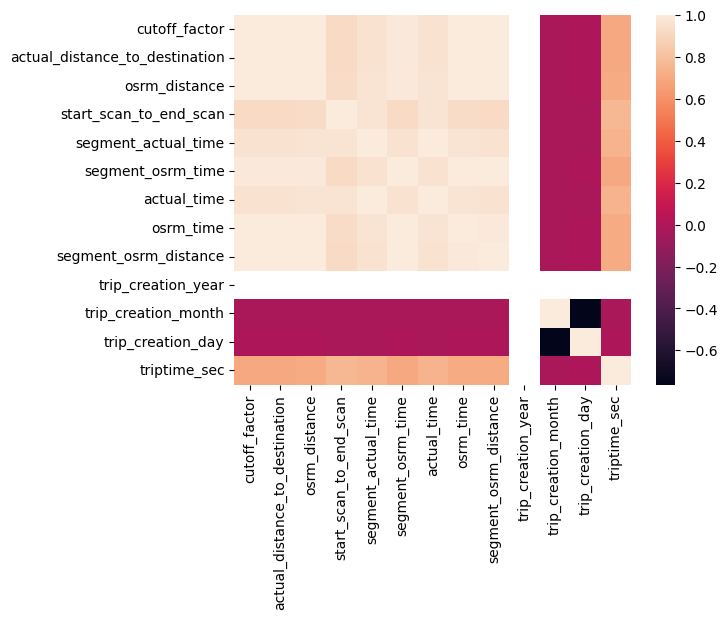

In [72]:
#Heatmap of dataframe
data_numeric = data.select_dtypes(include=['float64', 'int64'])

sns.heatmap(data_numeric.corr())

In [73]:
data_numeric.corr()

,cutoff_factor,actual_distance_to_destination,osrm_distance,start_scan_to_end_scan,segment_actual_time,segment_osrm_time,actual_time,osrm_time,segment_osrm_distance,trip_creation_year,trip_creation_month,trip_creation_day,triptime_sec
cutoff_factor,1.000000,0.999997,0.997444,0.921081,0.954552,0.988451,0.955434,0.994283,0.993405,NaN,-0.019440,-0.011132,0.703598
actual_distance_to_destination,0.999997,1.000000,0.997471,0.921345,0.954682,0.988498,0.955563,0.994361,0.993410,NaN,-0.019482,-0.011104,0.703577
osrm_distance,0.997444,0.997471,1.000000,0.927050,0.959676,0.992424,0.960492,0.997933,0.995036,NaN,-0.018993,-0.011031,0.704835
start_scan_to_end_scan,0.921081,0.921345,0.927050,1.000000,0.963516,0.921375,0.963525,0.929408,0.922120,NaN,-0.019450,-0.014236,0.765778
segment_actual_time,0.954552,0.954682,0.959676,0.963516,1.000000,0.954571,0.999978,0.959483,0.957497,NaN,-0.017506,-0.013692,0.745170
segment_osrm_time,0.988451,0.988498,0.992424,0.921375,0.954571,1.000000,0.955367,0.993647,0.996487,NaN,-0.019008,-0.010119,0.701954
actual_time,0.955434,0.955563,0.960492,0.963525,0.999978,0.955367,1.000000,0.960269,0.958320,NaN,-0.017533,-0.013676,0.745080
osrm_time,0.994283,0.994361,0.997933,0.929408,0.959483,0.993647,0.960269,1.000000,0.992408,NaN,-0.020042,-0.010269,0.704238
segment_osrm_distance,0.993405,0.993410,0.995036,0.922120,0.957497,0.996487,0.958320,0.992408,1.000000,NaN,-0.019023,-0.010496,0.707998
trip_creation_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='triptime_sec', ylabel='start_scan_to_end_scan'>

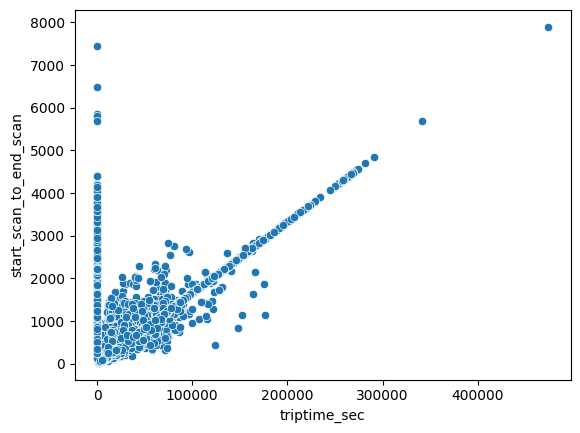

In [74]:
#Visualization of triptime and start_scan_to_end_scan
sns.scatterplot(x=data["triptime_sec"], y=data["start_scan_to_end_scan"])

# **Hypothesis Testing**

* Pearson Test between triptime and start_scan_to_end_scan

**H0**: Both Variables are not correlated

**Ha**: Both variables are correlated

In [75]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [76]:
test_statistics,p_value=pearsonr(data["triptime_sec"], data["start_scan_to_end_scan"])
print(p_value)
if p_value < alpha:
    print("Reject Null Hypotheis, Both Variables are correlated")
else:
    print("Fail to Reject Null Hypothesis,Both Variables are not correlated")

0.0
Reject Null Hypotheis, Both Variables are correlated


<Axes: xlabel='actual_distance_to_destination', ylabel='actual_time'>

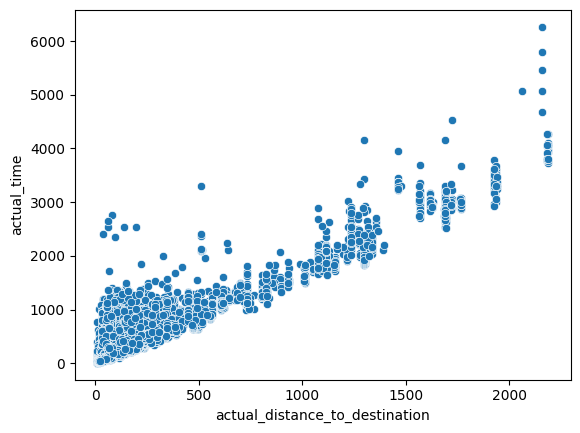

In [77]:
#Visualization between distance and time
sns.scatterplot(x=data["actual_distance_to_destination"],y=data["actual_time"])

* Pearson Test actual_time and actual_distance_to_destination

**H0**: Both Variables are not correlated

**Ha**: Both variables are correlated

In [78]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [79]:
test_statistics,p_value=pearsonr(data["actual_time"],data["actual_distance_to_destination"])
print(p_value)
if p_value < alpha:
    print("Reject Null Hypotheis, Both Variables are correlated")
else:
    print("Fail to Reject Null Hypothesis,Both Variables are not correlated")

0.0
Reject Null Hypotheis, Both Variables are correlated


<Axes: xlabel='actual_time', ylabel='osrm_time'>

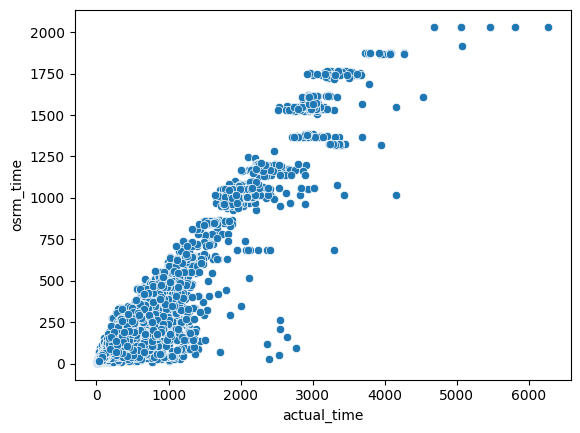

In [80]:
#Visualization between distance and time
sns.scatterplot(x=data["actual_time"],y=data["osrm_time"])

* T-Test for actual_time and osrm_time

**H0**: Mean of actual_time and osrm_time are same (mu_1 = mu_2)

**Ha**: Mean of actual_time is higher than osrm_time (mu_1 > mu_2)

In [81]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [82]:
test_statistics,p_value=ttest_ind(data["actual_time"],data["osrm_time"], alternative="greater")
print(p_value)
if p_value < alpha:
    print("Reject Null Hypotheis, Mean of actual_time and osrm_time are same")
else:
    print("Fail to Reject Null Hypothesis,ean of actual_time is higher than osrm_time")

1.0113592493195362e-274
Reject Null Hypotheis, Mean of actual_time and osrm_time are same


* Pearson Test actual_time and osrm_time

**H0**: Both Variables are not correlated

**Ha**: Both variables are correlated

In [83]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [84]:
test_statistics,p_value=pearsonr(data["actual_time"],data["osrm_time"])
print(p_value)
if p_value < alpha:
    print("Reject Null Hypotheis, Both Variables are correlated")
else:
    print("Fail to Reject Null Hypothesis,Both Variables are not correlated")

0.0
Reject Null Hypotheis, Both Variables are correlated


* T-Test for actual_time and segment_actual_time

**H0**: Mean of actual_time and segment_actual_time are same (mu_1 = mu_2)

**Ha**: Mean of actual_time and segment_actual_time are not same (mu_1 != mu_2)

In [85]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [86]:
test_statistics,p_value=ttest_ind(data["actual_time"],data["segment_actual_time"])
print(p_value)
if p_value < alpha:
    print("Reject Null Hypotheis, Mean of actual_time and segment_actual_time are not same")
else:
    print("Fail to Reject Null Hypothesis,Mean of actual_time and segment_actual_time are same")

0.6419956696137739
Fail to Reject Null Hypothesis,Mean of actual_time and segment_actual_time are same


* T-Test for osrm_time and segment_osrm_time

**H0**: Mean of osrm_time and segment_osrm_time are same (mu_1 = mu_2)

**Ha**: Mean of osrm_time and segment_osrm_time are not same (mu_1 != mu_2)

In [87]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [88]:
test_statistics,p_value=ttest_ind(data["osrm_time"],data["segment_osrm_time"])
print(p_value)
if p_value < alpha:
    print("Reject Null Hypotheis, Mean of osrm_time and segment_osrm_time are not same")
else:
    print("Fail to Reject Null Hypothesis,Mean of osrm_time and segment_osrm_time are same")

1.5413271810594524e-07
Reject Null Hypotheis, Mean of osrm_time and segment_osrm_time are not same


* T-Test for osrm_distance and segment_osrm_distance

**H0**: Mean of osrm_distance and segment_osrm_distance are same (mu_1 = mu_2)

**Ha**: Mean of osrm_distance and segment_osrm_distance are not same (mu_1 != mu_2)

In [89]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [90]:
test_statistics,p_value=ttest_ind(data["osrm_distance"],data["segment_osrm_distance"])
print(p_value)
if p_value < alpha:
    print("Reject Null Hypotheis, Mean of osrm_distance and segment_osrm_distance are not same")
else:
    print("Fail to Reject Null Hypothesis,Mean of osrm_distance and segment_osrm_distance are same")

0.0001606670222265932
Reject Null Hypotheis, Mean of osrm_distance and segment_osrm_distance are not same


# **Outliers Detection Using IQR Method**

In [96]:
num_cols = ['actual_distance_to_destination', 'osrm_distance', 'start_scan_to_end_scan', 'segment_actual_time', 'segment_osrm_time', 'actual_time','osrm_time',"segment_osrm_time","triptime_sec"]

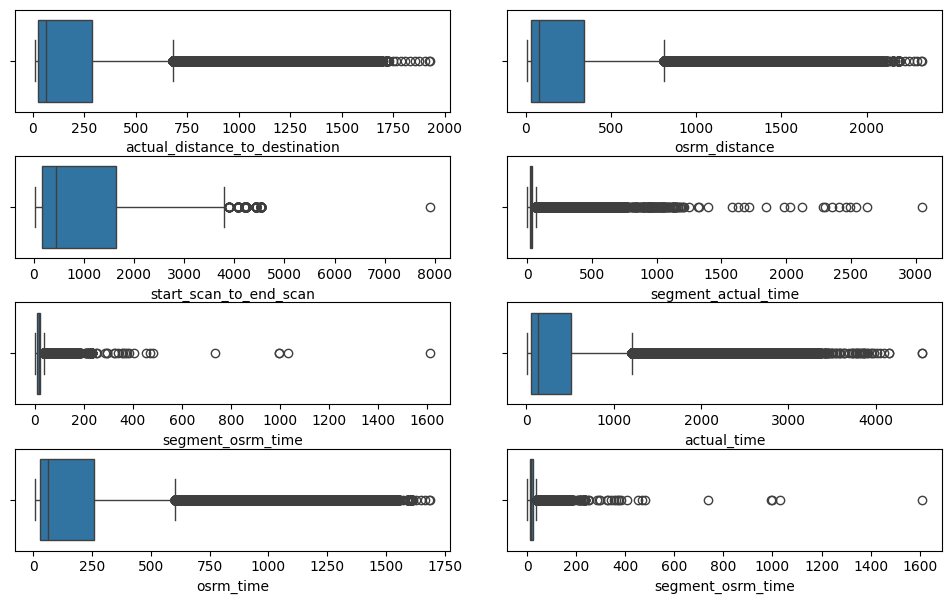

In [110]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(10,6))
fig.tight_layout()

index = 0
for row in range(4):
    for col in range(2):
        sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
        index += 1

plt.show()

In [111]:
data.describe()


,trip_creation_time,od_start_time,od_end_time,cutoff_factor,actual_distance_to_destination,osrm_distance,start_scan_to_end_scan,segment_actual_time,segment_osrm_time,actual_time,osrm_time,segment_osrm_distance,trip_creation_year,trip_creation_month,trip_creation_day,trip_time,triptime_sec
count,13892,13892,13892,13892.000000,13892.000000,13892.000000,13892.000000,13892.000000,13892.000000,13892.000000,13892.000000,13892.000000,13892.0,13892.000000,13892.000000,13892,13892.000000
mean,2018-09-22 13:07:02.641116416,2018-09-22 13:44:17.722910976,2018-09-22 20:29:21.842143744,159.986251,160.852618,200.437664,515.603657,346.118557,176.627627,349.267492,157.980564,218.437771,2018.0,9.114310,18.547653,0 days 06:45:04.119232843,24304.119233
min,2018-09-12 00:25:19.499696,2018-09-12 00:01:00.113710,2018-09-12 00:50:10.814399,9.000000,9.002461,9.072900,23.000000,9.000000,6.000000,9.000000,6.000000,9.072900,2018.0,9.000000,1.000000,0 days 00:00:00,0.000000
25%,2018-09-17 03:21:23.289982976,2018-09-17 04:12:26.345313536,2018-09-17 10:16:06.118688512,21.000000,22.037144,29.802900,144.000000,64.000000,30.000000,65.000000,29.000000,31.349950,2018.0,9.000000,14.000000,0 days 01:51:56.299656750,6716.299657
50%,2018-09-22 04:51:35.609723904,2018-09-22 04:52:36.690818048,2018-09-22 12:22:51.642557184,46.000000,46.163919,61.108100,264.000000,136.000000,62.000000,138.000000,57.500000,65.614850,2018.0,9.000000,20.000000,0 days 03:30:54.417636,12654.417636
75%,2018-09-27 17:28:45.461110016,2018-09-27 19:53:56.263667968,2018-09-28 02:16:22.134860288,148.000000,149.281573,193.689125,595.000000,349.000000,176.000000,353.000000,163.250000,204.588700,2018.0,9.000000,25.000000,0 days 07:04:21.465968500,25461.465969
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,2185.000000,2187.483994,2840.081000,7898.000000,6230.000000,2564.000000,6265.000000,2032.000000,3523.632400,2018.0,10.000000,30.000000,5 days 11:38:33.117274,473913.117274
std,NaN,NaN,NaN,307.520122,307.627703,373.619022,660.357703,561.918712,316.580388,567.051777,274.050917,419.933226,0.0,0.318199,7.753191,0 days 09:33:47.061593031,34427.061593


# **Outliers Treatment**

In [113]:
#Let's remove outliers using IQR Method
sses25th = 144
sses75th = 595
iqr = sses75th - sses25th
ssesuw = sses75th +1.5*iqr
ssesuw

1271.5

In [114]:
data[data["start_scan_to_end_scan"]> ssesuw]


,route_type,trip_uuid,trip_creation_time,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_factor,...,actual_time,osrm_time,segment_osrm_distance,source_state,destination_state,trip_creation_year,trip_creation_month,trip_creation_day,trip_time,triptime_sec
46,Carting,trip-153671813821616145,2018-09-12 01:33:48.711350,IND413517AAA,Udgir_NlgaonRd_D (Maharashtra),IND431603AAA,Nanded_Aswningr_I (Maharashtra),2018-09-12 09:44:13.402455,2018-09-13 00:46:22.053872,291,...,593.0,235.0,337.1176,Maharashtra,Maharashtra,2018.0,9.0,12.0,0 days 15:02:08.651417,54128.651417
433,Carting,trip-153679519504536979,2018-09-21 02:54:55.651098,IND530012AAA,Visakhapatnam_Gajuwaka_IP (Andhra Pradesh),IND530012AAA,Visakhapatnam_Gajuwaka_IP (Andhra Pradesh),2018-09-12 23:33:15.045633,2018-09-13 22:18:58.260294,194,...,304.0,168.0,228.2350,Andhra Pradesh,Andhra Pradesh,2018.0,9.0,21.0,0 days 22:45:43.214661,81943.214661
588,Carting,trip-153681898069638565,2018-10-03 13:07:13.296061,IND400072AAI,Mumbai_Chndivli_D (Maharashtra),IND000000AFS,Mumbai_Skynet_INT (Maharashtra),2018-09-13 07:10:45.472473,2018-09-14 06:23:48.451756,9,...,113.0,12.0,14.7276,Maharashtra,Maharashtra,2018.0,10.0,3.0,0 days 23:13:02.979283,83582.979283
621,Carting,trip-153682425240623736,2018-09-25 06:14:51.782383,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND401104AAB,Mumbai_MiraRoad_M (Maharashtra),2018-09-13 07:37:32.406544,2018-09-14 06:17:06.037037,16,...,59.0,27.0,29.6053,Maharashtra,Maharashtra,2018.0,9.0,25.0,0 days 22:39:33.630493,81573.630493
836,Carting,trip-153687754564273073,2018-09-27 02:48:03.391966,IND530012AAA,Visakhapatnam_Gajuwaka_IP (Andhra Pradesh),IND530012AAA,Visakhapatnam_Gajuwaka_IP (Andhra Pradesh),2018-09-13 22:25:43.913670,2018-09-14 20:39:35.934714,193,...,350.0,167.0,227.4162,Andhra Pradesh,Andhra Pradesh,2018.0,9.0,27.0,0 days 22:13:52.021044,80032.021044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14748,FTL,trip-153860451596867762,2018-09-24 05:06:56.558662,IND712311AAA,Kolkata_Dankuni_HB (West Bengal),IND712311AAA,Kolkata_Dankuni_HB (West Bengal),2018-10-03 22:08:35.968978,2018-10-04 22:26:30.408004,159,...,1342.0,145.0,197.2656,West Bengal,West Bengal,2018.0,9.0,24.0,1 days 00:17:54.439026,87474.439026
14754,FTL,trip-153860570045461434,2018-09-24 05:06:56.558662,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND834002AAB,Ranchi_Hub (Jharkhand),2018-10-03 22:28:20.454881,2018-10-05 08:39:47.996375,1010,...,1625.0,851.0,1222.2127,Haryana,Jharkhand,2018.0,9.0,24.0,1 days 10:11:27.541494,123087.541494
14764,FTL,trip-153860698042160875,2018-09-24 05:06:56.558662,IND131028AAB,Sonipat_Kundli_H (Haryana),IND131028AAB,Sonipat_Kundli_H (Haryana),2018-10-05 08:35:15.664489,2018-10-05 08:35:15.664489,1321,...,2003.0,1166.0,1747.4544,Haryana,Haryana,2018.0,9.0,24.0,0 days 00:00:00,0.000000
14773,FTL,trip-153860879439383883,2018-09-24 05:06:56.558662,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-10-06 04:27:23.392375,2018-10-06 04:27:23.392375,1931,...,3307.0,1739.0,2600.9869,Haryana,Haryana,2018.0,9.0,24.0,0 days 00:00:00,0.000000


In [115]:
#We will drop outliers which we have found using IQR Method
data.drop(data[data["start_scan_to_end_scan"]> ssesuw].index, inplace=True)

In [116]:
data.describe()


,trip_creation_time,od_start_time,od_end_time,cutoff_factor,actual_distance_to_destination,osrm_distance,start_scan_to_end_scan,segment_actual_time,segment_osrm_time,actual_time,osrm_time,segment_osrm_distance,trip_creation_year,trip_creation_month,trip_creation_day,trip_time,triptime_sec
count,12560,12560,12560,12560.000000,12560.000000,12560.000000,12560.000000,12560.000000,12560.000000,12560.000000,12560.000000,12560.000000,12560.0,12560.000000,12560.000000,12560,12560.000000
mean,2018-09-22 15:01:55.974861824,2018-09-22 13:14:45.159265536,2018-09-22 17:59:39.655986432,82.207006,83.047597,105.864573,340.209634,199.925080,97.330016,201.728344,88.656290,112.928154,2018.0,9.115446,18.591879,0 days 04:44:54.496720952,17094.496721
min,2018-09-12 00:25:19.499696,2018-09-12 00:01:00.113710,2018-09-12 00:50:10.814399,9.000000,9.002461,9.072900,23.000000,9.000000,6.000000,9.000000,6.000000,9.072900,2018.0,9.000000,1.000000,0 days 00:00:00,0.000000
25%,2018-09-17 05:23:36.585742080,2018-09-17 04:06:47.181209856,2018-09-17 08:22:35.810087936,21.000000,21.371169,28.290200,135.000000,60.000000,28.000000,61.000000,27.000000,29.320300,2018.0,9.000000,14.000000,0 days 01:50:43.119529750,6643.119530
50%,2018-09-22 09:11:30.250937088,2018-09-22 04:19:12.697853440,2018-09-22 08:43:56.948343552,39.000000,39.126693,49.867150,234.000000,114.000000,54.000000,116.000000,51.000000,54.772450,2018.0,9.000000,20.000000,0 days 03:18:03.833821,11883.833821
75%,2018-09-27 19:50:24.957410560,2018-09-27 19:36:40.066671616,2018-09-28 00:21:23.487930368,110.000000,110.677576,140.667500,445.000000,264.000000,136.000000,268.000000,118.000000,150.009625,2018.0,9.000000,25.000000,0 days 06:02:42.184283250,21762.184283
max,2018-10-03 23:59:42.701692,2018-10-04 20:15:07.233819,2018-10-05 02:38:49.857748,768.000000,769.326535,879.382200,1271.000000,1212.000000,867.000000,1213.000000,641.000000,1033.678700,2018.0,10.000000,30.000000,2 days 01:09:57.136511,176997.136511
std,NaN,NaN,NaN,97.457672,97.762589,122.336394,286.650425,208.697465,106.831672,210.071577,95.378159,131.105959,0.0,0.319572,7.801503,0 days 04:32:06.822854151,16326.822854


Here We can observe that by removing outliers in start_scan_to_end_scan column, other columns max values has been decreased significantly and further dropping columns will lead to loss of valuable data

# **Data Encoding**

In [117]:
data_encoding=data.copy()

In [118]:
data_encoding.shape


(12560, 25)

# **Label Encoding**

In [119]:
#Here We will use label encoder for encoding route_type column
le = LabelEncoder()

In [120]:
col="route_type"
data_encoding[col].value_counts()

,count
route_type,
Carting,8465
FTL,4095


In [121]:
data_encoding[col]=le.fit_transform(data_encoding[col])
data_encoding[col].value_counts()

,count
route_type,
0,8465
1,4095


# **Target Encoding**

In [137]:

!pip install category_encoders

from category_encoders import TargetEncoder

In [127]:
te=TargetEncoder()

In [128]:
#Here we will do target encoding for "source_center","source_name","destination_center","destination_name","source_state","destination_state" columns
columns=["source_center","source_name","destination_center","destination_name","source_state","destination_state"]
for col in columns:
    data_encoding[col]=te.fit_transform(data_encoding[col], data_encoding["route_type"])

In [129]:
data_encoding.info()



<class 'pandas.core.frame.DataFrame'>
Index: 12560 entries, 0 to 14786
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   route_type                      12560 non-null  int64          
 1   trip_uuid                       12560 non-null  object         
 2   trip_creation_time              12560 non-null  datetime64[ns] 
 3   source_center                   12560 non-null  float64        
 4   source_name                     12560 non-null  float64        
 5   destination_center              12560 non-null  float64        
 6   destination_name                12560 non-null  float64        
 7   od_start_time                   12560 non-null  datetime64[ns] 
 8   od_end_time                     12560 non-null  datetime64[ns] 
 9   cutoff_factor                   12560 non-null  int64          
 10  actual_distance_to_destination  12560 non-null  float64        

In [130]:
data_encoding.drop(["trip_uuid","trip_creation_time","od_start_time","od_end_time","trip_time"],axis=1, inplace=True)


In [131]:
data_encoding.head()

,route_type,source_center,source_name,destination_center,destination_name,cutoff_factor,actual_distance_to_destination,osrm_distance,start_scan_to_end_scan,segment_actual_time,segment_osrm_time,actual_time,osrm_time,segment_osrm_distance,source_state,destination_state,trip_creation_year,trip_creation_month,trip_creation_day,triptime_sec
0,0,0.224956,0.224956,2.317944e-01,2.317944e-01,72,73.186911,85.1110,180.0,141.0,65.0,143.0,68.0,84.1894,0.126357,0.156993,2018.0,9.0,20.0,0.000000
1,0,0.026667,0.026667,4.952686e-08,4.952686e-08,17,17.175274,19.6800,100.0,59.0,16.0,59.0,15.0,19.8766,0.198639,0.177807,2018.0,9.0,20.0,6029.696112
2,0,0.256210,0.256210,2.836151e-01,2.836151e-01,24,24.597048,28.0647,189.0,60.0,23.0,61.0,23.0,28.0647,0.259448,0.273547,2018.0,9.0,20.0,0.000000
3,0,0.018690,0.018690,2.178526e-01,2.178526e-01,9,9.100510,12.0184,98.0,24.0,13.0,24.0,13.0,12.0184,0.259448,0.273547,2018.0,9.0,20.0,5880.338041
4,0,0.000891,0.000891,4.033957e-06,4.033957e-06,22,22.424210,28.9203,146.0,64.0,34.0,64.0,34.0,28.9203,0.126357,0.156993,2018.0,9.0,20.0,10586.899446


# **Standardization**


In [135]:
#Here We will use MinMaxScaler method for standardizing dataframe
scaler=MinMaxScaler()
std_data=scaler.fit_transform(data_encoding)
std_data=pd.DataFrame(std_data, columns=data_encoding.columns)

In [136]:
std_data

,route_type,source_center,source_name,destination_center,destination_name,cutoff_factor,actual_distance_to_destination,osrm_distance,start_scan_to_end_scan,segment_actual_time,segment_osrm_time,actual_time,osrm_time,segment_osrm_distance,source_state,destination_state,trip_creation_year,trip_creation_month,trip_creation_day,triptime_sec
0,0.0,0.227004,0.227004,2.455594e-01,2.455594e-01,0.083004,0.084417,0.087369,0.125801,0.109726,0.068525,0.111296,0.097638,0.073313,0.103203,0.089502,0.0,0.0,0.655172,0.000000
1,0.0,0.026909,0.026909,5.246406e-08,5.246406e-08,0.010540,0.010749,0.012188,0.061699,0.041563,0.011614,0.041528,0.014173,0.010544,0.182698,0.112002,0.0,0.0,0.655172,0.034067
2,0.0,0.258542,0.258542,3.004574e-01,3.004574e-01,0.019763,0.020510,0.021822,0.133013,0.042394,0.019744,0.043189,0.026772,0.018536,0.249577,0.215500,0.0,0.0,0.655172,0.000000
3,0.0,0.018860,0.018860,2.307896e-01,2.307896e-01,0.000000,0.000129,0.003384,0.060096,0.012469,0.008130,0.012458,0.011024,0.002875,0.249577,0.215500,0.0,0.0,0.655172,0.033223
4,0.0,0.000899,0.000899,4.273507e-06,4.273507e-06,0.017128,0.017653,0.022805,0.098558,0.045719,0.032520,0.045681,0.044094,0.019371,0.103203,0.089502,0.0,0.0,0.655172,0.059814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12555,1.0,0.425476,0.425476,8.941138e-01,8.941138e-01,0.176548,0.178597,0.209090,0.664263,0.216958,0.150987,0.218439,0.209449,0.159903,0.418798,0.342118,0.0,0.0,0.793103,0.289181
12556,1.0,0.635162,0.635162,1.000000e+00,1.000000e+00,0.217391,0.220359,0.242704,0.524840,0.306733,0.218351,0.306478,0.292913,0.198886,0.460661,0.442377,0.0,0.0,0.793103,0.230396
12557,1.0,0.893970,0.893970,9.463165e-01,9.463165e-01,0.241107,0.244040,0.252936,0.796474,0.694929,0.199768,0.696013,0.270866,0.218141,0.997386,0.935294,0.0,0.0,0.793103,0.345594
12558,1.0,0.635162,0.635162,6.668095e-01,6.668095e-01,0.098814,0.099617,0.107215,0.186699,0.147132,0.099884,0.147841,0.135433,0.096250,0.460661,0.442377,0.0,0.0,0.793103,0.000000


# **Business Insights**

1. On average, osrm_time is lesser than segment_osrm_time
2. On average, osrm_distance is lesser than segment_osrm_distance
3. On average, There is no difference between actual time and segment actual time
4. On average, Actual time is higher than osrm time. While the maximum osrm_time is 400 mins (6.6 hrs), the actual time goes upto 800 mins (13 hrs) which is almost double
5. (9:00am to 12:00pm) and (5:00pm to 10:00pm) have higher delivery time
6. Wednesday is the busiest day of the week with maximum number of trips
7. (10:00pm to 1:00am) is the busiest time of the day having maximum number of trips- probably because the delivery time is least during these hours - less traffic on the roads
8. Carting route type is used for short-distance (0-100km) and short duration (<500 mins) trips while FTLs are used for long-distance (>100km) and long-duration (>300 mins) trips
9. FTL trips are 50% of carting trips in count
10. It can be observed that average speed in inter-state deliveries is much higher than the avg speed in intra-state deliveries
11. Delhi has the lowest intra-state delivery speed while Punjab has the highest


# **Recommendations**

1. Since actual time is higher than OSRM time on an average for all trips, the company needs to either improve their forecasting accuracy or identify root cause of delays in deliveries

2. Identify best practices from Maharashtra and Karnataka (states which have the highest volume of deliveries) to increase business in other states

3. To reduce actual_time, dispatch as many deliveries as possible outside of the busy hours

4. Optimise routes along corridors with maximum average speed to shorten delivery time

